In [1]:
import tensorflow as tf

enist=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=enist.load_data()

x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

model =tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2679 - acc: 0.9217
Epoch 2/3
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1111 - acc: 0.9662
Epoch 3/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0761 - acc: 0.9753


In [2]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.1018 - acc: 0.9695
0.10178127831891179 0.9695


In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
print(x_train[0])



<Figure size 640x480 with 1 Axes>

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [4]:
model.save('num_reader.model')

In [5]:
new_model=tf.keras.models.load_model('num_reader.model')

In [7]:
predictions= new_model.predict(x_test)

In [9]:
print(predictions)

[[2.87734618e-08 1.26645325e-08 1.06716107e-05 ... 9.99966741e-01
  6.82203506e-07 3.28573321e-07]
 [9.08052467e-10 6.54765026e-05 9.99933600e-01 ... 1.66792613e-09
  1.90218561e-08 4.16487071e-12]
 [3.14243143e-09 9.99976158e-01 5.94784706e-06 ... 4.23861502e-06
  2.91108017e-06 1.25474898e-07]
 ...
 [9.72725722e-09 7.08870357e-06 2.82531164e-06 ... 5.96330385e-04
  1.26200348e-05 1.14467274e-03]
 [1.04130304e-05 1.74347861e-05 6.01300201e-07 ... 1.67165194e-06
  4.18003532e-04 1.29855522e-07]
 [4.28070486e-08 2.04078573e-10 9.61107860e-10 ... 6.82359655e-11
  2.04053774e-09 1.18140339e-12]]


In [13]:
import numpy as np

print(np.argmax(predictions[3]))

0


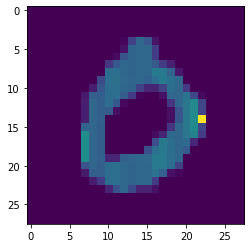

In [14]:
plt.imshow(x_test[3])
plt.show()